### Preambule

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import *

In [2]:
def myplot(x, y, xlabel, ylabel, xlim = None, ylim = None, xplot = (), yplot = (), dpi = 150, cords = (-0.15, 0.5), title = "", lgd = ""):
    fig = plt.figure(figsize=(5*np.sqrt(2), 5), dpi=dpi)
    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')
    # plt.rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
    # plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
    # plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    # plt.rc('text.latex', preamble=r'\usepackage{amssymb}')

    ax1 = fig.add_subplot(111)
    ax1.set_title(title, fontsize=18, fontweight='bold')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.scatter(x, y, color = 'r', s = 15)

    ax1.set_xlabel(xlabel, fontsize = 14)
    ax1.set_ylabel(ylabel, rotation = 0, fontsize = 14)

    ax1.set_xlim(xlim[0], xlim[1])
    ax1.set_ylim(ylim[0], ylim[1])

    if not len(xplot) == 0:
        ax1.plot(xplot, yplot, linewidth = 1, color = 'k', label = lgd)

    # ax1.errorbar(x, y, yerr=yr, xerr = xr, color = 'k', linestyle = 'None', linewidth = 1)

    ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(10))

    ax1.minorticks_on()

    ax1.set_axisbelow(True)

    # ax1.grid(alpha = 0.5)
    ax1.grid(which='major', linewidth=0.7, alpha = 0.7)
    ax1.grid(which='minor', linestyle=':', linewidth=0.5, alpha = 0.7)

    ax1.yaxis.set_label_coords(cords[0], cords[1]) #custom positioning
    ax1.legend()

    plt.show()

In [3]:
def mnk(x, y, type):
    if type == "kx+b":
        D_xy = np.mean(x*y) - np.mean(x)*np.mean(y)
        D_xx = np.mean(x**2) - np.mean(x)**2
        D_yy = np.mean(y**2) - np.mean(y)**2
        k = D_xy/D_xx
        b = np.mean(y) - k*np.mean(x)
        sigma_k = np.sqrt(1/(len(x) - 2) * (D_yy/D_xx - k**2))
        sigma_b = sigma_k * np.sqrt(np.mean(x**2))
        return ((k, b), (sigma_k, sigma_b))
    elif type == "kx":
        k = np.mean(x*y)/np.mean(x**2)
        sigma_k = sigma_k = np.sqrt(1/(len(x) - 1) * (np.mean(y**2)/np.mean(x**2) - k**2))
        return (k, sigma_k)

### Heap sort

In [4]:
heap = pd.DataFrame({"n":[], "t":[]})

In [5]:
with open("E:\C++\FEFM_cpp_3sem\labs\Lab 1\cmake-build-debug\heap.txt", encoding="UTF-8") as f:
    s = len(f.readlines())

with open("E:\C++\FEFM_cpp_3sem\labs\Lab 1\cmake-build-debug\heap.txt", encoding="UTF-8") as f:    
    for i in range(s-1):
        t, n = map(float, f.readline().split())
        heap.at[i, "n"] = n
        heap.at[i, "t"] = t
        i += 1

# heap

In [6]:
heap["logn"] = np.log(heap["n"])
heap["logt"] = np.log(heap["t"])

In [7]:
solh = mnk(heap['logn'], heap['logt'], "kx+b")
ah, bh = solh[0]
xh = np.linspace(10e3, 500e3, 100)
yh = np.exp(np.log(xh)*ah + bh)

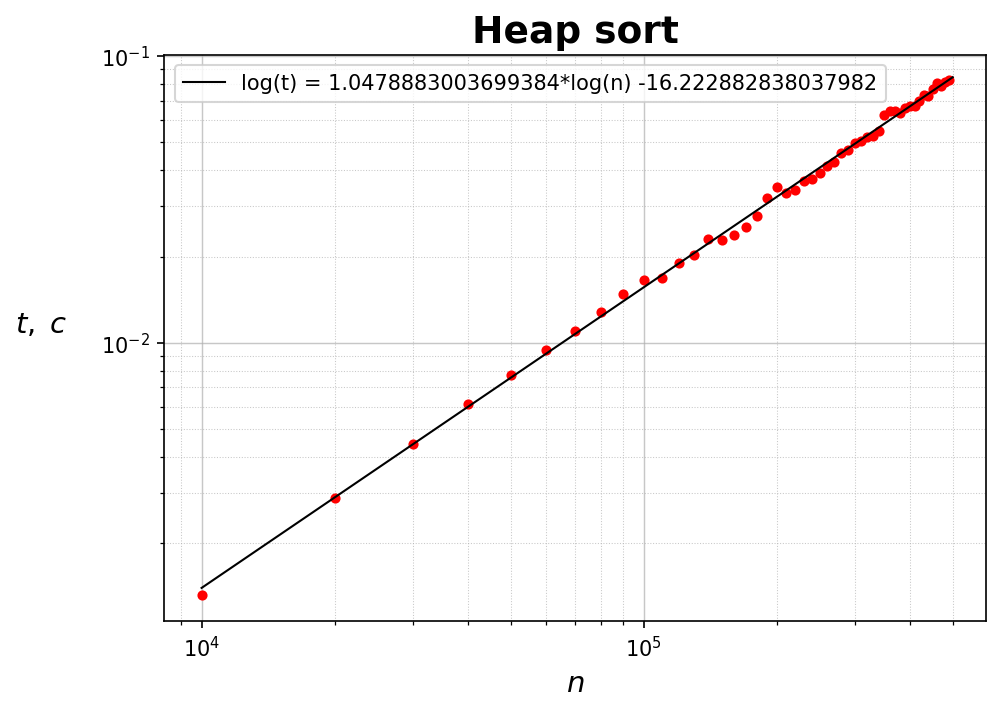

In [8]:
myplot(heap["n"], heap["t"], '$n$', '$t, \; с$', xlim = (None, None), ylim = (None, None), xplot=xh, yplot=yh, title="Heap sort", lgd = "log(t) = " + str(ah) + "*log(n) " + str(bh))

### Merge sort

In [9]:
merge = pd.DataFrame({"n":[], "t":[]})

In [10]:
with open("E:\C++\FEFM_cpp_3sem\labs\Lab 1\cmake-build-debug\merge.txt", encoding="UTF-8") as f:
    s = len(f.readlines())

with open("E:\C++\FEFM_cpp_3sem\labs\Lab 1\cmake-build-debug\merge.txt", encoding="UTF-8") as f:    
    for i in range(s-1):
        t, n = map(float, f.readline().split())
        merge.at[i, "n"] = n
        merge.at[i, "t"] = t
        i += 1

# merge

In [11]:
merge["logn"] = np.log(merge["n"])
merge["logt"] = np.log(merge["t"])

In [12]:
solm = mnk(merge['logn'], merge['logt'], "kx+b")
am, bm = solm[0]
xm = np.linspace(10e3, 500e3, 100)
ym = np.exp(np.log(xm)*am + bm)

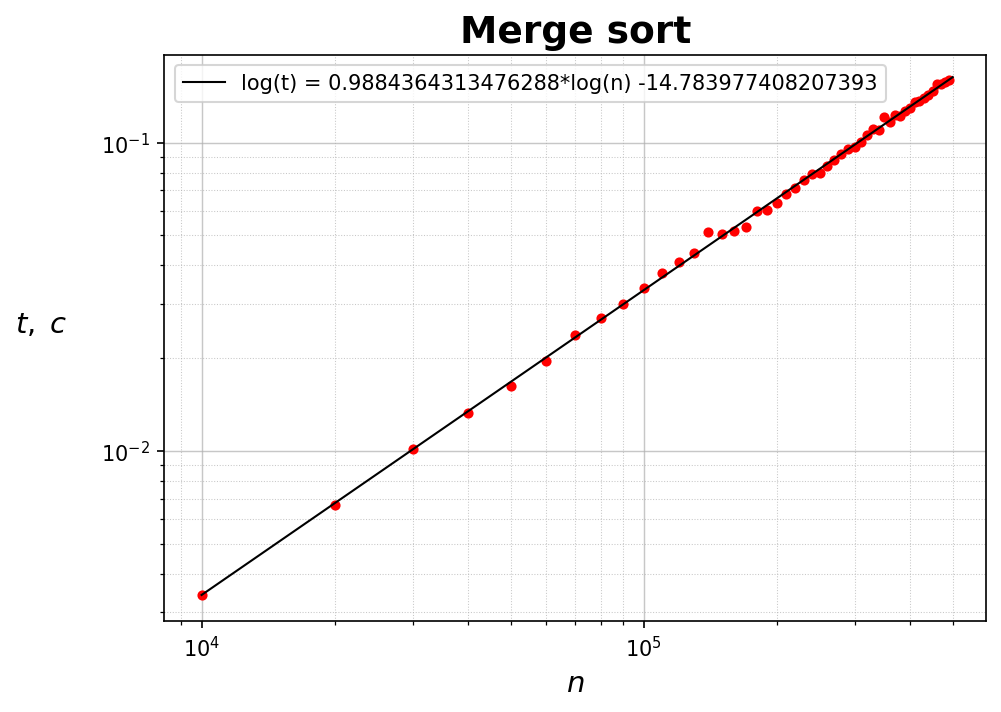

In [13]:
myplot(merge["n"], merge["t"], '$n $', '$t, \; с$', xlim = (None, None), ylim = (None, None), xplot=xm, yplot=ym, title="Merge sort", lgd = "log(t) = " + str(am) + "*log(n) " + str(bm))